In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [44]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


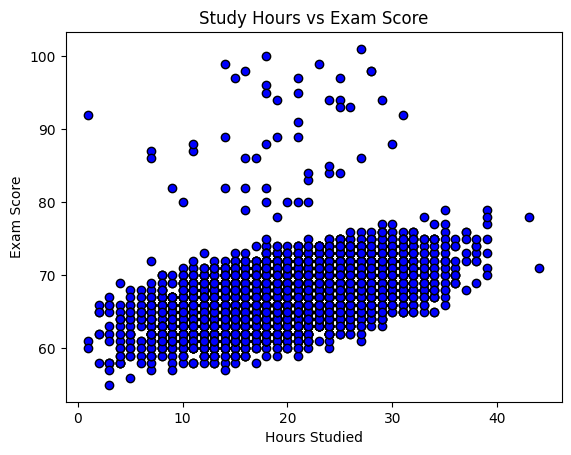

In [45]:
plt.scatter(df["Hours_Studied"], df["Exam_Score"], color="blue", edgecolor="black")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

In [10]:
df.fillna({
    'Teacher_Quality' : df['Teacher_Quality'].mode()[0],
    'Parental_Education_Level' : df['Parental_Education_Level'].mode()[0],
    'Distance_from_Home' : df['Distance_from_Home'].mode()[0]
    } , inplace=True)

In [11]:
df.sort_values(by = "Exam_Score" , ascending=False).head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98


In [46]:
X = df[["Hours_Studied"]]
y = df["Exam_Score"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model

Linear Regression:
MSE: 10.85592128879332
R² Score: 0.2319868674542106
MAE: 2.4475687452945643


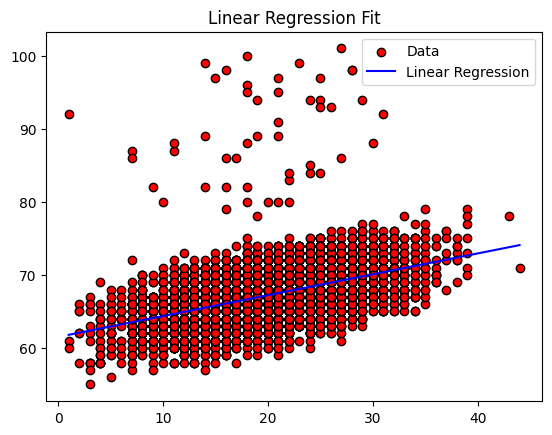

In [48]:
#Linear Regression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("R² Score:", r2_score(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))

# Plot Linear Regression
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_linear_plot = linear_model.predict(x_range)

plt.scatter(X, y, color="red", label="Data", edgecolor="black")
plt.plot(x_range, y_linear_plot, color="blue", label="Linear Regression")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

#  Poly Regression Model


Polynomial Regression (degree=2):
MSE: 10.84498813570501
R² Score: 0.23276034442853466


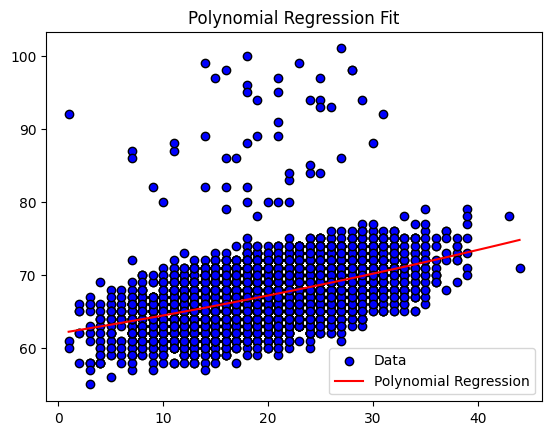

In [50]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_pred_poly = poly_model.predict(x_poly_test)

print("\nPolynomial Regression (degree=2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))

# Plot
x_range_poly = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_poly_plot = poly_model.predict(poly.transform(x_range_poly))

plt.scatter(X, y, color="blue", label="Data", edgecolor="black")
plt.plot(x_range_poly, y_poly_plot, color="red", label="Polynomial Regression")
plt.legend()
plt.title("Polynomial Regression Fit")
plt.show()

# Feature Combination Experiment (Bonus)


In [51]:
features = ["Hours_Studied", "Sleep_Hours", "Attendance", "Previous_Scores", "Motivation_Level"]
X_multi = df[features]
y = df["Exam_Score"]

x_train, x_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(x_train, y_train)
y_pred_multi = multi_model.predict(x_test)

print("\nMulti-Feature Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))
print("MAE:", mean_absolute_error(y_test, y_pred_multi))


Multi-Feature Linear Regression:
MSE: 5.334587003714133
R² Score: 0.6225992463863976
MAE: 1.3562462297233384


In [52]:
#Compare Models
results = pd.DataFrame({
    "Model": ["Linear (Hours Only)", "Polynomial (Hours Only)", "Multi-Feature Linear"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_multi)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_multi)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linear),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_multi)
    ]
})
print("\nModel Comparison:\n", results)


Model Comparison:
                      Model        MSE  R² Score       MAE
0      Linear (Hours Only)  10.855921  0.231987  2.447569
1  Polynomial (Hours Only)  10.844988  0.232760  2.444780
2     Multi-Feature Linear   5.334587  0.622599  1.356246


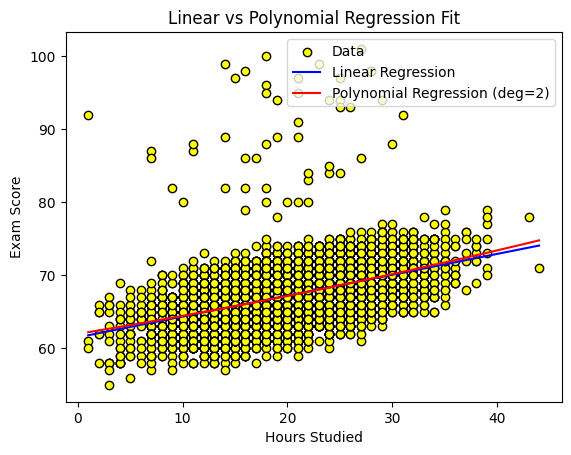

In [53]:
x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_linear_plot = linear_model.predict(x_range)
y_poly_plot = poly_model.predict(poly.transform(x_range))

plt.scatter(X, y, color="yellow", label="Data", edgecolor="black")
plt.plot(x_range, y_linear_plot, color="blue", label="Linear Regression")
plt.plot(x_range, y_poly_plot, color="red", label="Polynomial Regression (deg=2)")
plt.legend()
plt.title("Linear vs Polynomial Regression Fit")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()